In [13]:
#packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as ls 
from tqdm import tqdm
from scipy.signal import find_peaks
import networkx as nx 
import importlib
import source_file as sf
importlib.reload(source_file)

import matplotlib as mpl
mpl.rc('font', size=18)
mpl.rc('legend', fontsize=18)
mpl.rc('legend', numpoints=1)
mpl.rc('legend', handlelength=1.5)
mpl.rc('legend', frameon=False)
#mpl.rc('xtick.major', pad=7)
#mpl.rc('xtick.minor', pad=7)
mpl.rc('lines', lw=2)
mpl.rc('xtick',labelsize =15) 
mpl.rc('ytick',labelsize =15)


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
'''Plotting all the eigenvalues of a hypercube as a function of gamma'''

#parameters
dim = 10
gamma =  np.arange(0.01,0.6,0.01)
w  = 0
kappa = 0

eigval = np.zeros((len(gamma), 2**dim))

for i in range(len(gamma)):

    #Hamiltonian matrix
    H = sf.hypercube_hamiltonian_networkx(dim,gamma[i],w,kappa)

    #get the eigenvalue and right eigenstates
    eig_val,_ = np.linalg.eigh(H)
    eigval[i] = np.sort(eig_val)

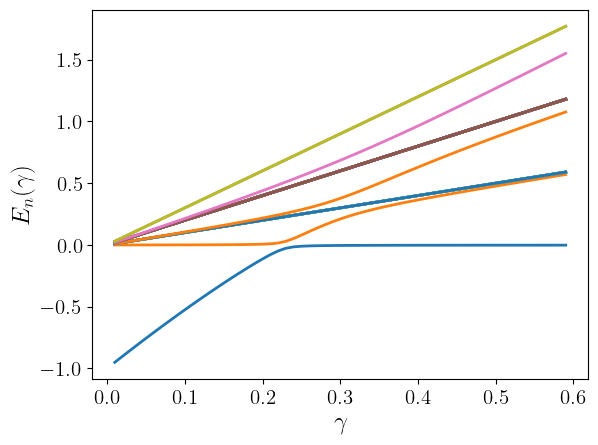

In [14]:
for i in range(len(gamma)):
    plt.plot(gamma,eigval[:,i])

plt.xlabel(r'$\gamma$')
plt.ylabel(r'$E_{n}(\gamma)$')
plt.show()

In [14]:
#parameters
dim =10
w  = 0
kappa = 0
gamma =   np.arange(0.01,0.6,0.01)


overlap_0,overlap_1,overlap_2,overlap_3 = sf.overlap_hypercube(dim,gamma,w,kappa)

100%|██████████| 59/59 [00:33<00:00,  1.75it/s]


NameError: name 'eig_diff' is not defined

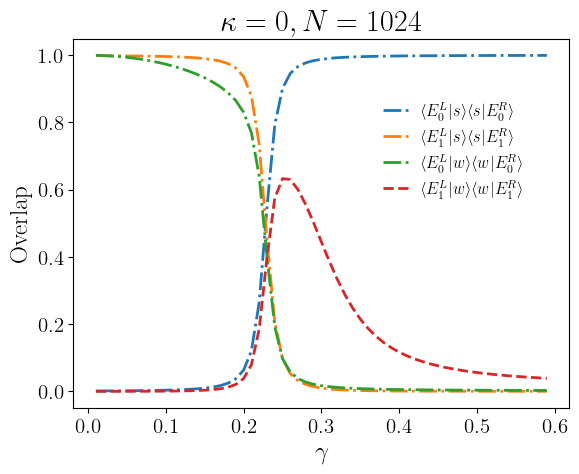

In [15]:
plt.plot(gamma, np.abs(overlap_0),'-.',label = r'$\langle E_0^L | s \rangle \langle s | E_0^R \rangle $')

plt.plot(gamma, np.abs(overlap_1),'-.',label = r'$\langle E_1^L | s \rangle \langle s | E_1^R \rangle$')

plt.plot(gamma, np.abs(overlap_2),'-.',label = r'$\langle E_0^L | w \rangle \langle w | E_0^R \rangle $')

plt.plot(gamma, np.abs(overlap_3),'--',label = r'$\langle E_1^L | w \rangle \langle w | E_1^R \rangle$')

plt.plot(gamma, np.abs(eig_diff),'--',label = r'$E_1 - E_0$')

#plt.axvline(1.0,linestyle = '--',color = 'k',linewidth =1)

plt.legend(fontsize = 12, loc = (0.61,0.55))
plt.xlabel(r'$\gamma$')
plt.ylabel(r'Overlap')
plt.title(r'$\kappa = 0, N = 1024$')

#plt.savefig(r'Overlap_k1_N500.pdf',bbox_inches = 'tight')
plt.show()